In [1]:
from sklearn.datasets import make_blobs
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors.kd_tree import KDTree

### First, we generate some sample data.

In [2]:
n_samples = 1500
random_state = 170
X, _ = make_blobs(n_samples=n_samples,
                  centers=5,
                  random_state=random_state)

mins = np.amin(X, axis=0)
maxs = np.amax(X, axis=0) 


### Then we set the number of clusters k.

In [3]:
k = 2

### Define Helper function for plotting

In [4]:
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, k)]
old_clusters = []

def plot_kmeans(cluster_coords, ind):
    plt.figure()
    plt.scatter(X[:, 0],
                X[:, 1],
                c=list(map(lambda x: colors[x[0]], ind)),
                s=2)
    
    plt.scatter(cluster_coords[:, 0],
                cluster_coords[:, 1],
                marker="o",
                edgecolors='k',
                facecolors=colors,
                s=150)

    for old_cluster in old_clusters:
        plt.scatter(old_cluster[:, 0],
                    old_cluster[:, 1],
                    marker="o",
                    edgecolors='k',
                    facecolors=colors,
                    alpha=0.3,
                    s=100)    

    plt.xlim(mins[0], maxs[0])
    plt.ylim(mins[1], maxs[1])
    plt.show()


### Initialize random cluster centers

In [5]:
cluster_coords = np.random.uniform(low=mins,
                                   high=maxs,
                                   size=(k, 2))

### Step 1: Assign data points to nearest cluster center and update cluster centers

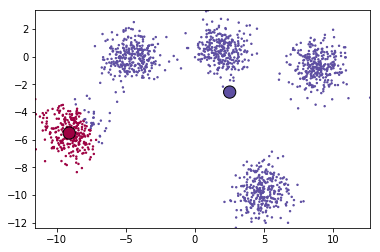

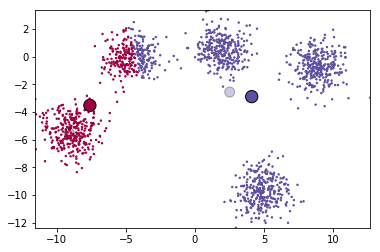

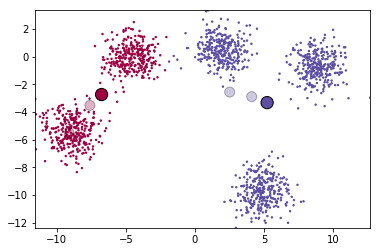

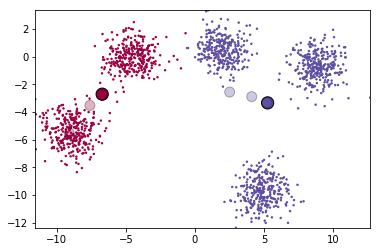

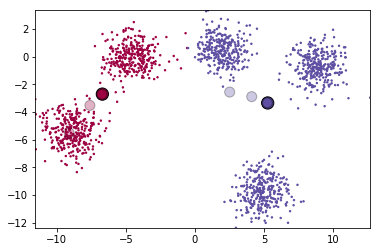

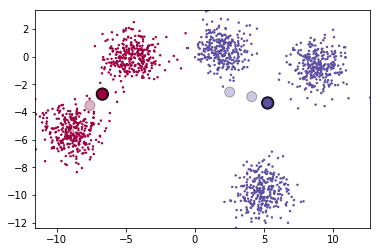

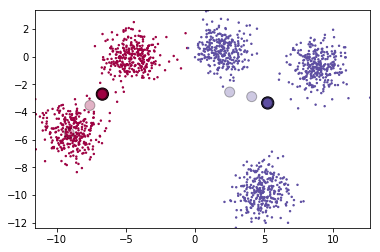

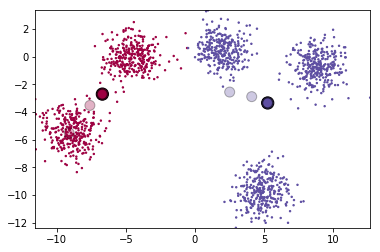

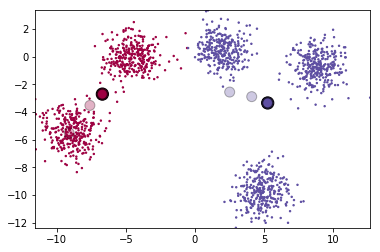

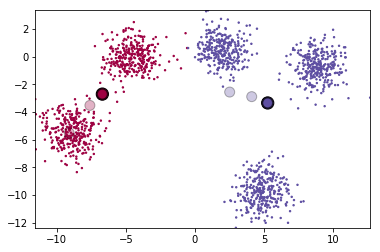

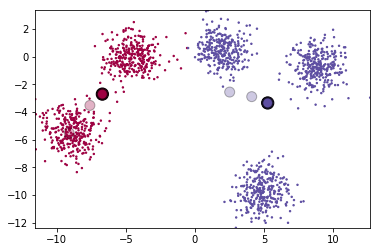

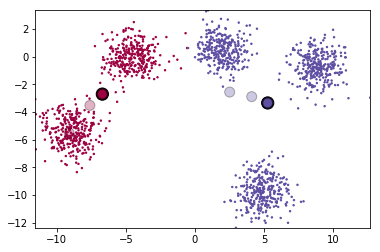

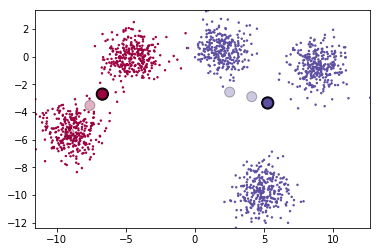

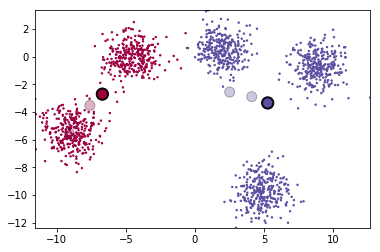

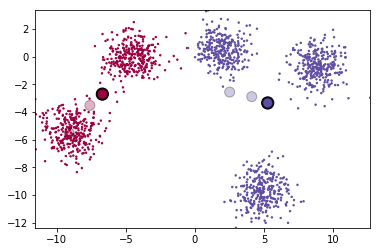

In [6]:
steps = 15

for _ in range(steps):

    # Assign 

    tree = KDTree(cluster_coords)
    dist, ind = tree.query(X, k=1)

    # Update cluster centers
    idx = ind.reshape(X.shape[0])
    for i in range(k):
        cluster_coords[i] = X[idx==i,:].mean(axis=0)

    plot_kmeans(cluster_coords, ind)
    old_clusters.append(np.copy(cluster_coords))